In [83]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
df= pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


This dataset contain data of temperature forecast, it has 7752 rows and 25 columns, out of which 2 are our independent variable i.e Tmax and Tmin and the remaining are dependent variables.

In [85]:
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [86]:
df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7742,18.0,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7
7743,19.0,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6
7744,20.0,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [87]:
df.shape

(7752, 25)

In [88]:
df.columns
print('The Dimension of the dataset:',df.shape)
print('The Column header in the dataset:',df.columns)

The Dimension of the dataset: (7752, 25)
The Column header in the dataset: Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [89]:
min_temp_next = df['Next_Tmin'].min()
print("Minimum Temp Next day:", min_temp_next)
max_temp_next = df['Next_Tmax'].max()
print("Maximum Temp Next day :", max_temp_next)

Minimum Temp Next day: 11.3
Maximum Temp Next day : 38.9


It's shows that dataset contains min. temp 11.3degree C amd th maxi. temp is 38.9 degree C.

In [90]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

There are only two type of data is present i.e float64 and object.

In [91]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [92]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')




In [93]:
#Filling missing value with mean data
df1=df.fillna(df.mean())
df1


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30 00:00:00,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30 00:00:00,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30 00:00:00,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30 00:00:00,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30 00:00:00,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30 00:00:00,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30 00:00:00,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30 00:00:00,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,2015-07-30 21:36:00,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [94]:
df1.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

Here you can see all the details of the data.

In [96]:
print('total duplicate rows are', df1.duplicated().sum())

total duplicate rows are 0


So, there is no duplicate rows present in the dataset

In [97]:
df1.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,2015-07-30 21:35:59.999999744,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,2015-07-30 21:36:00,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,2016-08-15 00:00:00,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000
std,7.210637,NaN,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276


From the above discription we can observe the following things: The counts of all the columns are same which means there is no missing values in the dataset. Next_Tmax: The next-day maximum temperature ranges from 17.4°C to 38.9°C, with an average of 30.27°C. The range and average are consistent with the present-day maximum temperature.
Next_Tmin: The next-day minimum temperature ranges from 11.3°C to 29.8°C, with an average of 22.93°C. Again, this is consistent with the present-day minimum temperature. LDAPS_RHmin: The minimum relative humidity forecast ranges from 19.79% to 98.52%, with an average of 56.76%. This wide range indicates varying humidity conditions, from quite dry to very humid.
LDAPS_RHmax: The maximum relative humidity forecast ranges from 58.94% to 100%, with an average of 88.37%. The high maximum values suggest periods of very high humidity.

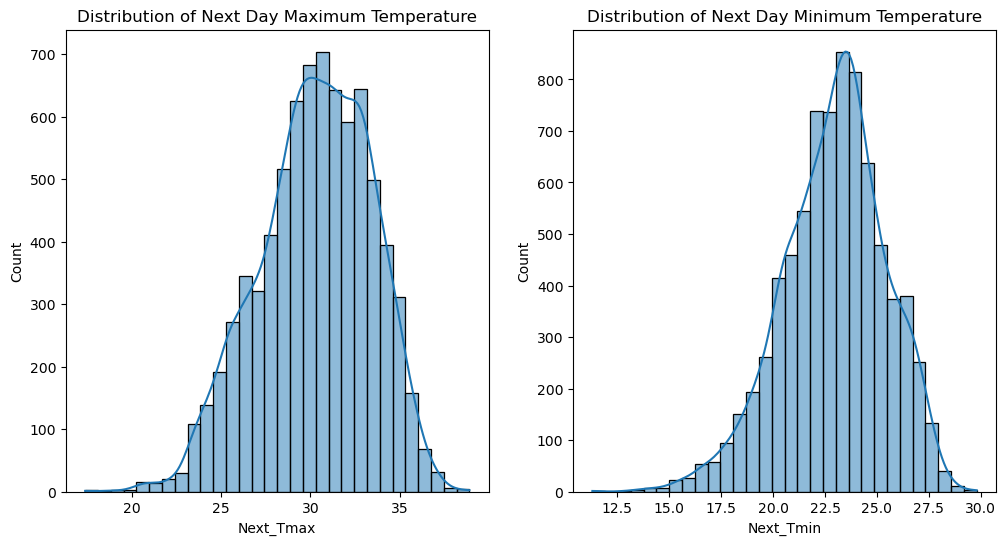

In [98]:
# Distribution of Next_Tmax and Next_Tmin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['Next_Tmax'], bins=30, kde=True)
plt.title('Distribution of Next Day Maximum Temperature')

plt.subplot(1, 2, 2)
sns.histplot(df1['Next_Tmin'], bins=30, kde=True)
plt.title('Distribution of Next Day Minimum Temperature')

plt.show()


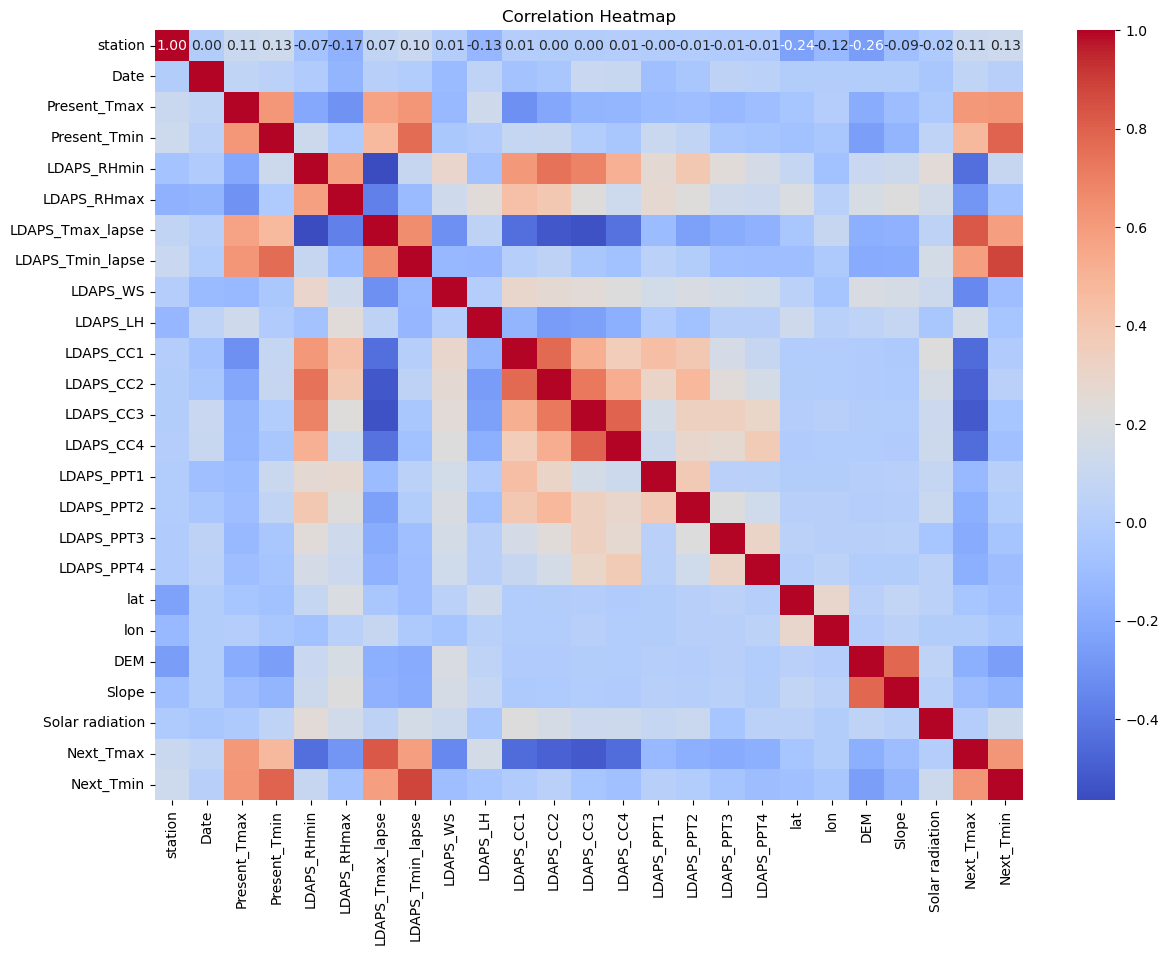

In [99]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


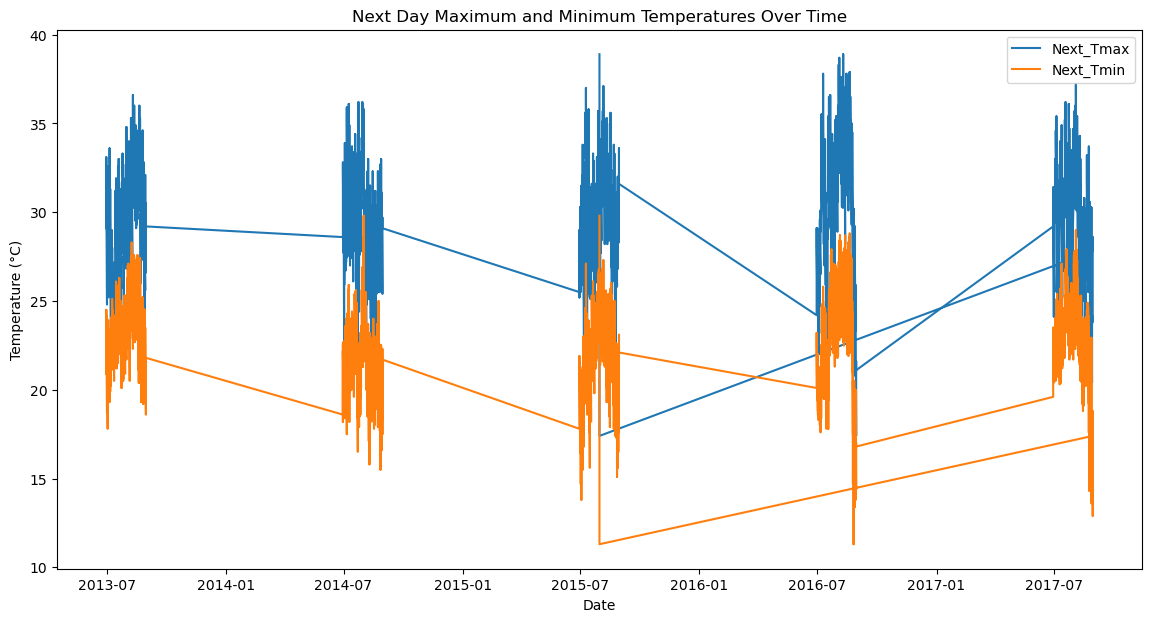

In [100]:
# Time series plot of Next_Tmax and Next_Tmin
plt.figure(figsize=(14, 7))
plt.plot(df1['Date'], df1['Next_Tmax'], label='Next_Tmax')
plt.plot(df1['Date'], df1['Next_Tmin'], label='Next_Tmin')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Next Day Maximum and Minimum Temperatures Over Time')
plt.legend()
plt.show()


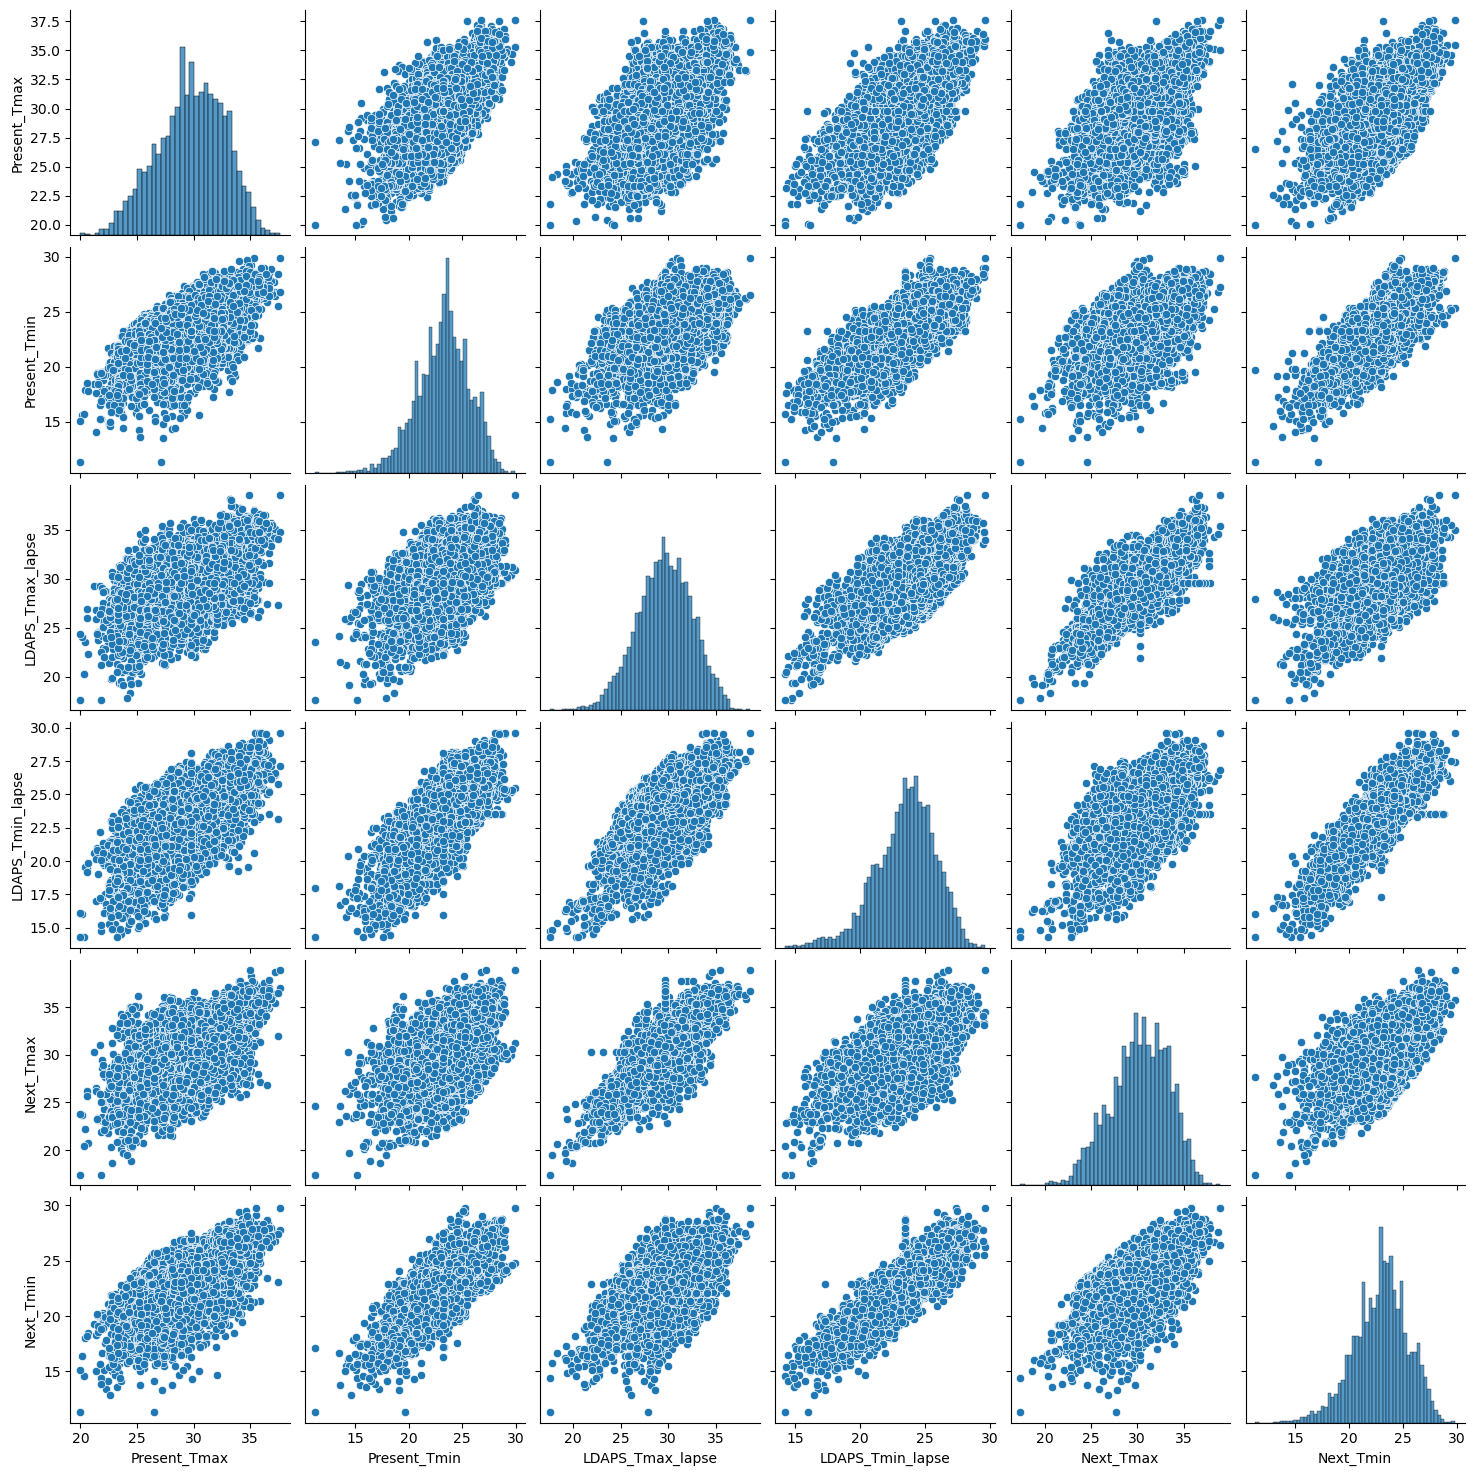

In [101]:
# Pair plot
sns.pairplot(df1[['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'Next_Tmax', 'Next_Tmin']])
plt.show()


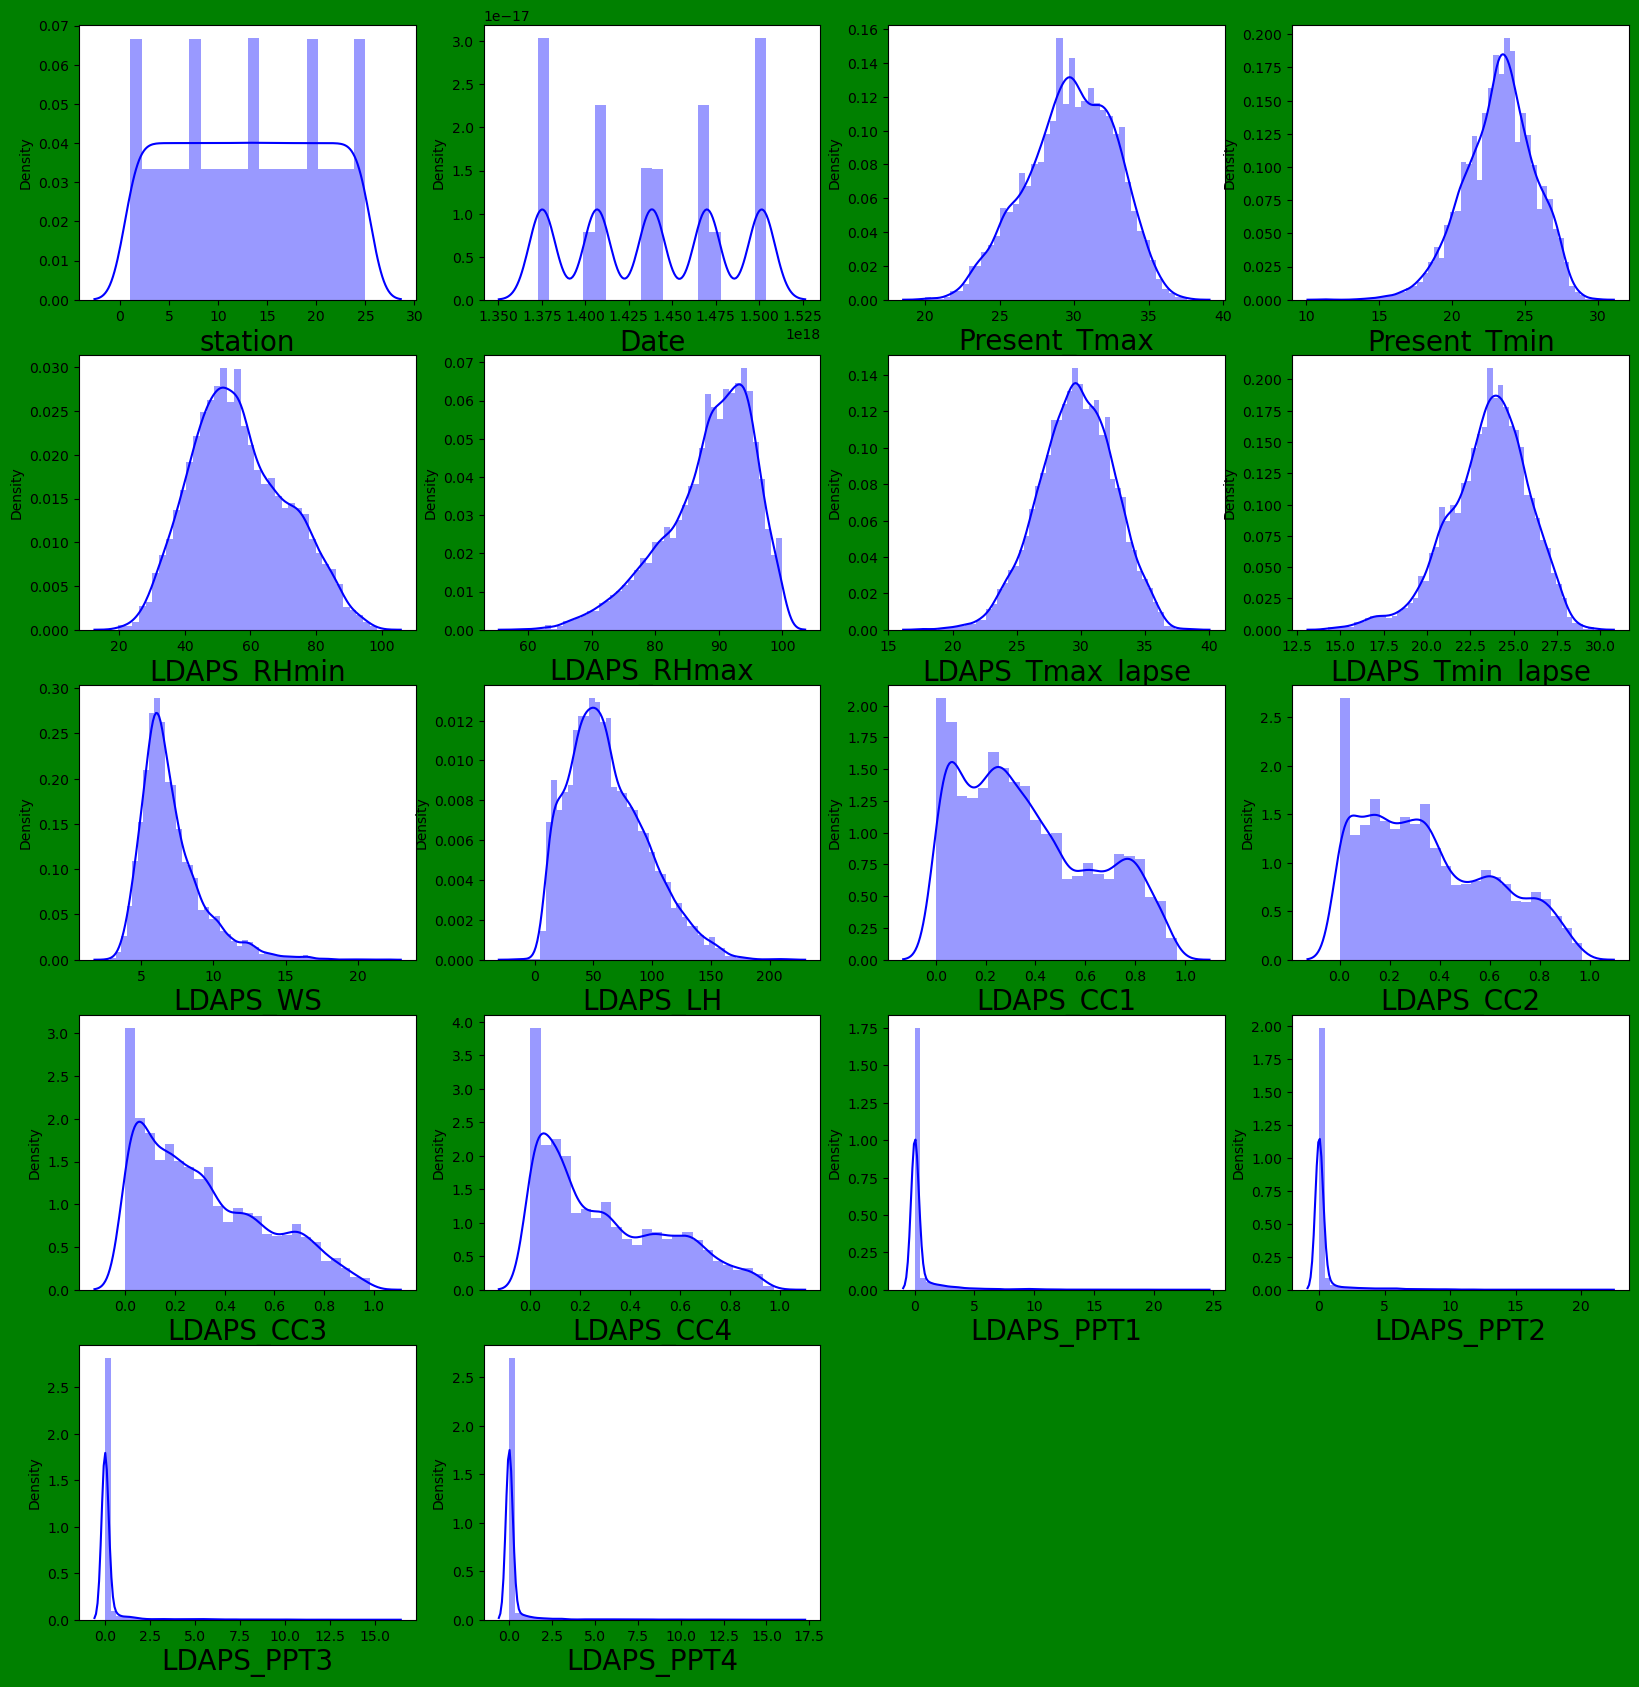

In [102]:
plt.figure(figsize=(20,25), facecolor="green")
plotnumber = 1
for column in df1:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column], color ='b')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

In [103]:
# Seperating the independent variables and atarget variables into x and y
x = df1.drop(columns=['Date', 'Next_Tmax', 'Next_Tmin'])
y = df1['Next_Tmax']


print('Feature Dimension=', x.shape)
print('Label Dimension', y.shape)

Feature Dimension= (7752, 22)
Label Dimension (7752,)


In [104]:
#lINEAR REGRESSION ALGORITHIMS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

In [105]:
# finding the best random state
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum r score is ', maxAccu,'On random_state ',maxRS ) 

Maximum r score is  0.7839095476555809 On random_state  63


In [106]:
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=maxRS)

In [107]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_test,pred_LR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_LR))
print("Mean Squared Error",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LR)))

LinearRegression()
R2_score: 0.7839095476555809
R2_score on training data: 76.05825388235696
Mean Absolute Error: 1.1238571837595845
Mean Squared Error 2.177997918497924
Root Mean Squared Error: 1.475804159940581


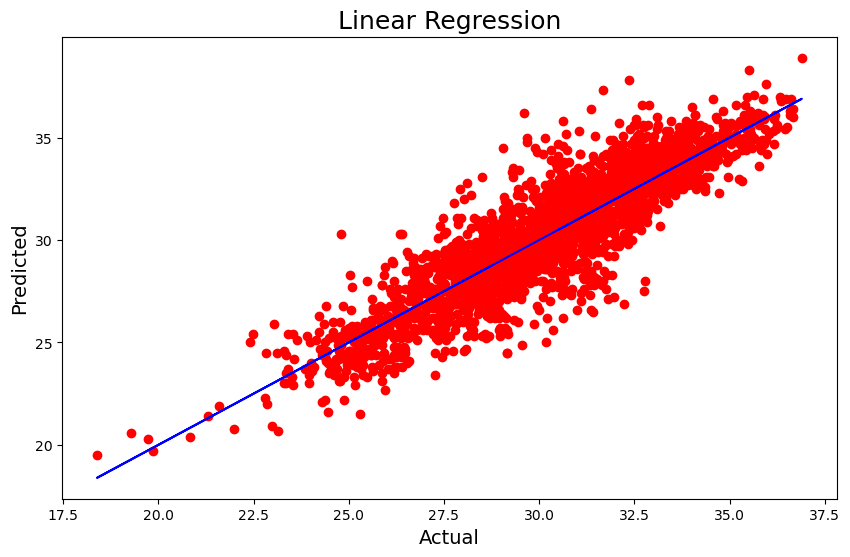

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color= 'r')
plt.plot(pred_LR, pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [109]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test,pred_RFR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
print("Mean Squared Error",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

RandomForestRegressor()
R2_score: 0.9020623104495256
R2_score on training data: 98.46062433172007
Mean Absolute Error: 0.740977455080739
Mean Squared Error 0.9871240569363277
Root Mean Squared Error: 0.9935411702271465


In [110]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(y_test,pred_GBR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print("Mean Squared Error",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.848353277570996
R2_score on training data: 86.48632294097986
Mean Absolute Error: 0.9515896150266057
Mean Squared Error 1.528462929361503
Root Mean Squared Error: 1.236310207577978


In [111]:
Knn=KNN()
Knn.fit(x_train,y_train)
pred_Knn = Knn.predict(x_test)
pred_train = Knn.predict(x_train)
print(Knn)
print('R2_score:',r2_score(y_test,pred_Knn))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_Knn))
print("Mean Squared Error",mean_squared_error(y_test,pred_Knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_Knn)))

KNeighborsRegressor()
R2_score: 0.5119117990535413
R2_score on training data: 69.21995618054142
Mean Absolute Error: 1.710210525729964
Mean Squared Error 4.919491232358645
Root Mean Squared Error: 2.217992613233562


In [112]:
#Checking for cross Validation score and performing Hyperperameter tuning
from sklearn.model_selection import cross_val_score

In [113]:
score = cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.70528405 0.68475309 0.66480911 0.79408515 0.65978375]
0.7017430287105079
Difference between R2 score and Cross Validation Score is 14.661024886048812


In [114]:
score1 = cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.70528405 0.68475309 0.66480911 0.79408515 0.65978375]
0.7017430287105079
Difference between R2 score and Cross Validation Score is 20.03192817390177


In [115]:
score2 = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.70528405 0.68475309 0.66480911 0.79408515 0.65978375]
0.7017430287105079
Difference between R2 score and Cross Validation Score is 8.216651894507299


From the diff of both r2 score and cross validation score computed on r2 score we conclude that Randomforest regressor is our best fit and now we use hyper paramter to get the best model.

In [116]:
# Performing Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [117]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [118]:
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [119]:
  best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [120]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)
# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model Mean Squared Error: {mse_tuned}")
print(f"Tuned Model R-squared: {r2_tuned*100}")

Tuned Model Mean Squared Error: 0.9824619536936532
Tuned Model R-squared: 90.25248618551214


So our model is preforming well on predicting the Next Max temp, our accuracy is 90.18%. And now we will check the next min temp.

In [121]:
# Seperating the independent variables and atarget variables into x and z
x = df1.drop(columns=['Date', 'Next_Tmax', 'Next_Tmin'])
z = df1['Next_Tmin']


print('Feature Dimension=', x.shape)
print('Label Dimension', z.shape)

Feature Dimension= (7752, 22)
Label Dimension (7752,)


In [122]:
# REGRESSION ALGORITHIMS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

Creating train test split

In [123]:
# finding the best random state
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,z_train,z_test = train_test_split(x,z, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, z_train)
    pred = lr.predict(x_test)
    acc = r2_score(z_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum r score is ', maxAccu,'On random_state ',maxRS ) 

Maximum r score is  0.8404598264905467 On random_state  36


In [124]:
LR = LinearRegression()
LR.fit(x_train,z_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(z_test,pred_LR))
print("R2_score on training data:",r2_score(z_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(z_test, pred_LR))
print("Mean Squared Error",mean_squared_error(z_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(z_test, pred_LR)))

LinearRegression()
R2_score: 0.8344446284351436
R2_score on training data: 82.77491891095026
Mean Absolute Error: 0.792986103050773
Mean Squared Error 1.0298042913366714
Root Mean Squared Error: 1.0147927331907098


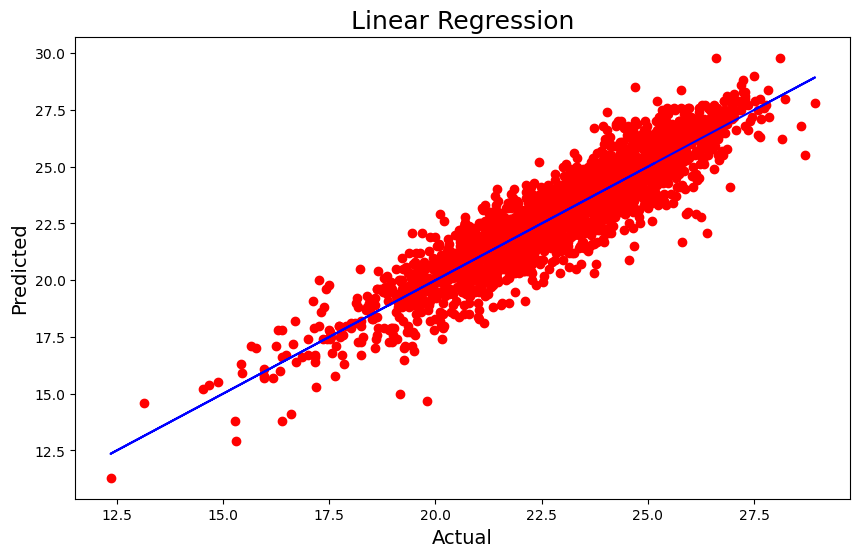

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=z_test,color= 'r')
plt.plot(pred_LR, pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [126]:
RFR= RandomForestRegressor()
RFR.fit(x_train,z_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(z_test,pred_RFR))
print("R2_score on training data:",r2_score(z_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(z_test, pred_RFR))
print("Mean Squared Error",mean_squared_error(z_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(z_test, pred_RFR)))

RandomForestRegressor()
R2_score: 0.8985777926634919
R2_score on training data: 98.60689101227838
Mean Absolute Error: 0.5913775607109171
Mean Squared Error 0.6308766871454683
Root Mean Squared Error: 0.7942774623174627


In [127]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,z_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(z_test,pred_GBR))
print("R2_score on training data:",r2_score(z_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(z_test, pred_GBR))
print("Mean Squared Error",mean_squared_error(z_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(z_test, pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.884228376646127
R2_score on training data: 90.31466441657241
Mean Absolute Error: 0.6519473370663925
Mean Squared Error 0.7201343781112288
Root Mean Squared Error: 0.8486073167910049


In [128]:
Knn=KNN()
Knn.fit(x_train,z_train)
pred_Knn = Knn.predict(x_test)
pred_train = Knn.predict(x_train)
print(Knn)
print('R2_score:',r2_score(z_test,pred_Knn))
print("R2_score on training data:",r2_score(z_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(z_test, pred_Knn))
print("Mean Squared Error",mean_squared_error(z_test,pred_Knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(z_test, pred_Knn)))

KNeighborsRegressor()
R2_score: 0.5106249813473265
R2_score on training data: 68.09218562585717
Mean Absolute Error: 1.354330950810731
Mean Squared Error 3.044060059893978
Root Mean Squared Error: 1.7447234909560823


We will check for cross validation score

In [129]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GBR,x,z, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(z_test,pred_GBR)-score.mean())*100)

[0.70489245 0.66317803 0.83092067 0.85693027 0.87804638]
0.7867935609401766
Difference between R2 score and Cross Validation Score is 9.743481570595037


In [130]:
score1 = cross_val_score(RFR,x,z, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(z_test,pred_RFR)-score.mean())*100)

[0.70489245 0.66317803 0.83092067 0.85693027 0.87804638]
0.7867935609401766
Difference between R2 score and Cross Validation Score is 11.17842317233153


In [131]:
score2 = cross_val_score(LR,x,z, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(z_test,pred_LR)-score.mean())*100)

[0.70489245 0.66317803 0.83092067 0.85693027 0.87804638]
0.7867935609401766
Difference between R2 score and Cross Validation Score is 4.765106749496695


From the diff of both r2 score and cross validation score computed on r2 score we conclude that Randomforest regressor is our best fit and now we use hyper paramter to get the best model.

In [132]:
# Performing Hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
modelz= RandomForestRegressor()

In [133]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [134]:
modelz = RandomForestRegressor()
grid_search = GridSearchCV(modelz, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, z_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [135]:
best_params_z = grid_search.best_params_
print("Best Hyperparameters:", best_params_z)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [136]:
best_modelz = grid_search.best_estimator_
z_pred_tuned = best_modelz.predict(x_test)
# Evaluate the tuned model
mse_tuned = mean_squared_error(z_test, z_pred_tuned)
r2_tuned = r2_score(z_test, z_pred_tuned)

print(f"Tuned Model Mean Squared Error: {mse_tuned}")
print(f"Tuned Model R-squared: {r2_tuned*100}")

Tuned Model Mean Squared Error: 0.5898324414131385
Tuned Model R-squared: 90.5176226375586


In [137]:
# Evaluate the model for Next_Tmax
mse_max = mean_squared_error(y_test, y_pred_tuned)
r2_max = r2_score(y_test, y_pred_tuned)

print(f'Next_Tmax - Mean Squared Error: {mse_max}')
print(f'Next_Tmax - R^2 Score: {r2_max}')

# Evaluate the model for Next_Tmin
mse_min = mean_squared_error(z_test, z_pred_tuned)
r2_min = r2_score(z_test, z_pred_tuned)

print(f'Next_Tmin - Mean Squared Error: {mse_min}')
print(f'Next_Tmin - R^2 Score: {r2_min}')


Next_Tmax - Mean Squared Error: 0.9824619536936532
Next_Tmax - R^2 Score: 0.9025248618551214
Next_Tmin - Mean Squared Error: 0.5898324414131385
Next_Tmin - R^2 Score: 0.905176226375586


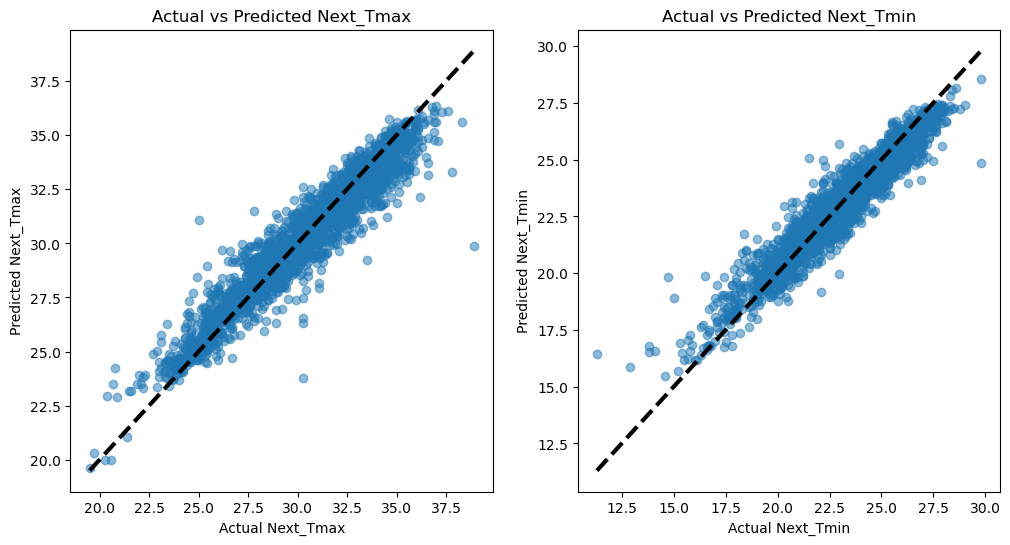

In [140]:
plt.figure(figsize=(12, 6))

# Plot for Next_Tmax
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Actual vs Predicted Next_Tmax')

# Plot for Next_Tmin
plt.subplot(1, 2, 2)
plt.scatter(z_test, z_pred_tuned, alpha=0.5)
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'k--', lw=3)
plt.xlabel('Actual Next_Tmin')
plt.ylabel('Predicted Next_Tmin')
plt.title('Actual vs Predicted Next_Tmin')

plt.show()


This approach builds a complex Random forest regression model to predict next-day maximum and minimum temperatures.